# 1

Read the documentation at https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/appletaste.html.
    

# 2

In [3]:
import pandas as pd
apl_df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/appletaste.csv", index_col=0)
apl_df.head(15)

,aftertaste,panelist,product
1,89,a,937
2,98,a,298
3,108,a,493
4,13,b,937
5,55,b,298
6,104,b,493
7,40,c,937
8,122,c,298
9,148,c,493
10,6,d,937


# 3

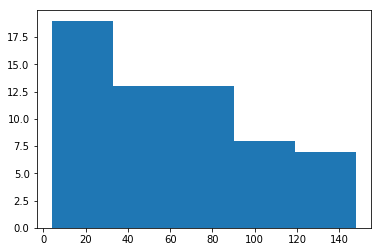

In [5]:
import matplotlib.pyplot as plt
apl_hist = plt.hist(apl_df['aftertaste'], bins=5)
plt.show()

# 4

In [25]:
# By looking at the data we can conclude that there are 15 rows for each group
apl_df['group']=[1] * 15 + [2] * 15 + [3] * 15 + [4] * 15
avgat_df = apl_df.groupby('group')[['aftertaste']].mean()
avgat_df

,aftertaste
group,
1,80.866667
2,66.933333
3,44.600000
4,51.800000


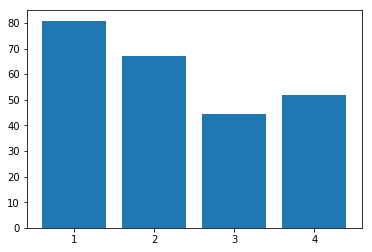

In [26]:
# Plot the barchart
plt.bar(range(0, 4), height=avgat_df['aftertaste'], tick_label=avgat_df.index)
# Function savefig() must be called before show(); 
# the bbox_inches value 'tight' forces the function to fit exactly everything into the png
plt.savefig('aftertastes.png', format='png', bbox_inches='tight')
plt.show()

# 5

In [29]:
# Import the stats package and apply Kendall's Tau
import scipy.stats as ss
f, p = ss.f_oneway(apl_df['aftertaste'][apl_df['group']==1], apl_df['aftertaste'][apl_df['group']==2], apl_df['aftertaste'][apl_df['group']==3], apl_df['aftertaste'][apl_df['group']==4])
print("f-statistic: " + str(f) + "\np-value: " + str(p))

f-statistic: 2.7554481865429605
p-value: 0.05083259547004685


**AN ALTERNATIVE** way to call **f_oneway()**:

- the star (\*) operator placed at the beginning of the argument list to f_oneway() allows us to pass in a list comprehension that creates a list of value series
- not storing the values returned by the method into variables results in the interactive mechanism printing out the return values (as these are what the function call evaluates to)

In [31]:
ss.f_oneway(*(apl_df['aftertaste'][apl_df['group'] == group] for group in range(1, 5)))

F_onewayResult(statistic=2.7554481865429605, pvalue=0.05083259547004685)

Interpretation: The p value is not very low. At any usual confidence levels (e.g. 5% or 1%) the f-statistic value is not significant, indicating no significance in the difference between the scores given by the 4 groups.

# 6

We will use Chi-square test as the two variables are categorical.

First we create the aftertaste_score_category column

In [68]:
number_of_instances = len(apl_df['aftertaste'])
apl_df['aftertaste_score_category'] = ['low'] * number_of_instances
for i in apl_df.index:
    if apl_df['aftertaste'][i] > 100:
        apl_df.loc[i, 'aftertaste_score_category'] = 'high'
    elif apl_df['aftertaste'][i] > 50:
        apl_df.loc[i, 'aftertaste_score_category'] = 'medium'        
apl_df.head(5)

,aftertaste,panelist,product,group,score_category,aftertaste_score_category
1,89,a,937,1,medium,medium
2,98,a,298,1,medium,medium
3,108,a,493,1,high,high
4,13,b,937,1,low,low
5,55,b,298,1,medium,medium


**AN ALTERNATIVE** way to create the aftertaste_score_category column: using a lambda function to implement the same logic as above

In [70]:
apl_df['aftertaste_score_category'] = apl_df['aftertaste'].apply(lambda x : 'high' if x > 100 else 'medium' if x > 50 else 'low')
apl_df.head(5)

,aftertaste,panelist,product,group,score_category,aftertaste_score_category
1,89,a,937,1,medium,medium
2,98,a,298,1,medium,medium
3,108,a,493,1,high,high
4,13,b,937,1,low,low
5,55,b,298,1,medium,medium


**ANOTHER ALTERNATIVE** way to create the aftertaste_score_category column: using **loc** indexing with booleans (<code>apl_df['aftertaste'] > 100</code> evaluates to a series of booleans) 

In [72]:
apl_df.loc[:,'aftertaste_score_category'] = 'low'
apl_df.loc[apl_df['aftertaste'] > 50,'aftertaste_score_category'] = 'medium'
apl_df.loc[apl_df['aftertaste'] > 100,'aftertaste_score_category'] = 'high'
apl_df.head(5)

,aftertaste,panelist,product,group,score_category,aftertaste_score_category
1,89,a,937,1,medium,medium
2,98,a,298,1,medium,medium
3,108,a,493,1,high,high
4,13,b,937,1,low,low
5,55,b,298,1,medium,medium


In [75]:
score_vs_group_tab = pd.crosstab(index=apl_df['product'], columns=apl_df['aftertaste_score_category'])
score_vs_group_tab

aftertaste_score_category,high,low,medium
product,,,
298,1,3,11
493,7,2,6
649,2,9,4
937,0,13,2


In [76]:
# Apply the Chi-squared test to the data
chisq, p, dof, evs = ss.chi2_contingency(score_vs_group_tab)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 31.34557165861514
p = 2.177416225761056e-05
degrees of freedom = 6
expected value table: 
[[2.5  6.75 5.75]
 [2.5  6.75 5.75]
 [2.5  6.75 5.75]
 [2.5  6.75 5.75]]


Interpretation: The p value is low. At any usual confidence levels (e.g. 5% or 1%) the chi-squared statistic value is significant, indicating a significant difference between the scores awarded to the different apple sorts.